# Feature Selection


## The Data:
- The dataset is available here: http://lib.stat.cmu.edu/datasets/bodyfat 
- Test subjects were measured by their body fat percentage, along with a number of other physical measurements

In [13]:
### import the data and show it (I've gotta move that up here)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
data = pd.read_csv('Large.Bodyfat.csv')
data.head()

,case,percent fat,age,weight (lbs),height (inches),neck circum (cm),chest circum (cm),abdomen circum (cm),hip circum (cm),thigh circum (cm),knee circum (cm),ankle circum (cm),biceps circum (cm),forearm circum (cm),wrist circum (cm)
0,1,12.6,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,6.9,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,24.6,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,10.9,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,27.8,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


As we can see, we have the 14 measurements broken into 14 columns, along with a column labeled **case**. The case column doesn't seem to be important, so we're going to remove it.

In [15]:
data.drop(['case'],axis=1,inplace=True)
data.head()

,percent fat,age,weight (lbs),height (inches),neck circum (cm),chest circum (cm),abdomen circum (cm),hip circum (cm),thigh circum (cm),knee circum (cm),ankle circum (cm),biceps circum (cm),forearm circum (cm),wrist circum (cm)
0,12.6,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## **Our goal**: Predict a person's body fat percentage using the other measurements
  - We have 13 predictors that can be used to determine this
  - Below is each predictor plotted against a person's body fat percentage

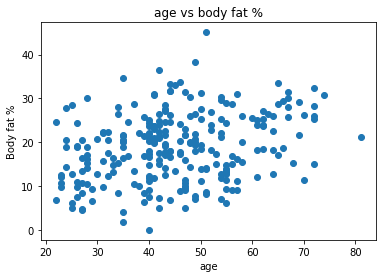

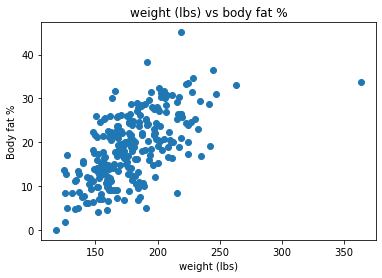

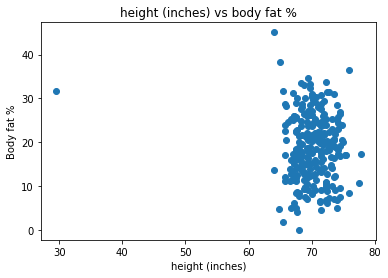

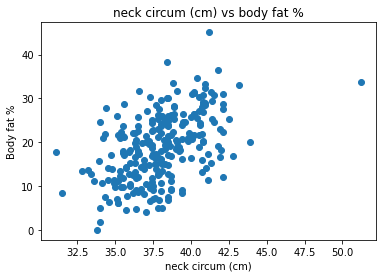

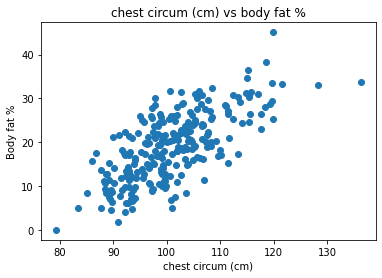

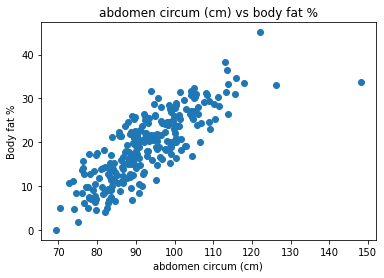

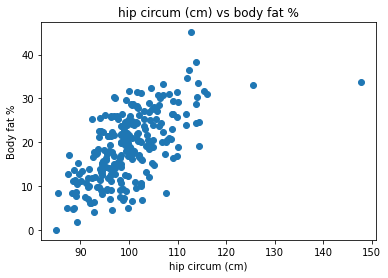

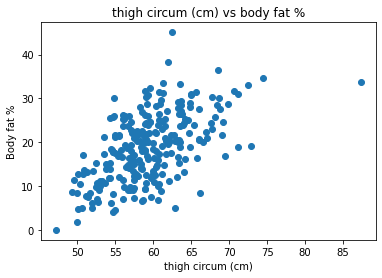

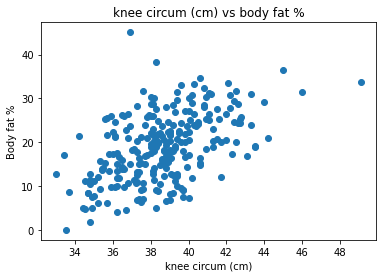

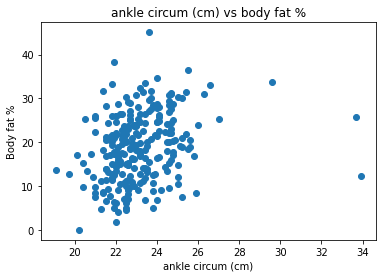

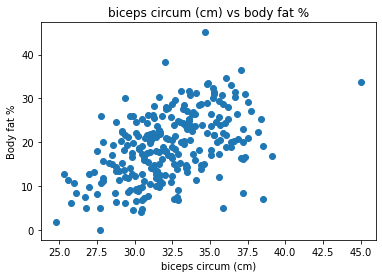

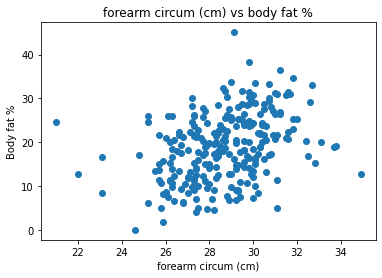

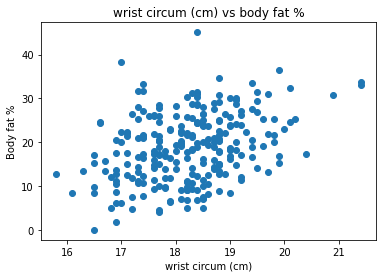

In [16]:
### I'm going to plot the data here
for item in data:
  if item != "percent fat":
    plt.scatter(data[item],data["percent fat"])
    plt.title(item + " vs body fat %")
    plt.ylabel("Body fat %")
    plt.xlabel(item)
    plt.show()

## Linear regression
- Below is a linear regression using a 70/30 train-test split

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## I reshaped y to put all of the values on the same scale
Xs = data.drop(['percent fat'], axis = 1)
y = data['percent fat'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.30, random_state=40)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred_train_lr= lin_reg.predict(X_train)
print("MSE on training: ",np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print("R2 on training: ",r2_score(y_train, pred_train_lr))

pred_test_lr= lin_reg.predict(X_test)
print("MSE on testing: ", np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print("R2 on testing: ", r2_score(y_test, pred_test_lr))

MSE on training:  3.8331239773898442
R2 on training:  0.7575839155547655
MSE on testing:  4.153905802585031
R2 on testing:  0.7004342473058762


As we can see, our linear regression yields an R^2 value of 0.7 on our testing data. This isn't that bad. However, the model performs better when run on the training data (as expected). This indicates that the model reduces bias in exchange for worse accuracy


## Ridge Regression
- A ridge regression will be used to see if it fits the data better than the linear regression. It should perform **no worse** on the testing data than the linear regression model
- We will use the ridge regression to take a look at what features have been deemed "most important"

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV

ridge = Ridge()

### Here, I'm plugging in different values for lambda and choosing the one that models things best
parameters = {'alpha': [10 ** a for a in range(-6, 6)]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(Xs,y)

print("Best alpha value: ", ridge_regressor.best_params_['alpha'])

## Now, I'm creating a ridge regression using the calculated alpha, and running it on our data
model_ridge = Ridge(alpha=10)
model_ridge.fit(X_train, y_train) 

pred_train_ridge= model_ridge.predict(X_train)
print("MSE on training: ", np.sqrt(mean_squared_error(y_train,pred_train_ridge))) 
print("R2 on training: ", r2_score(y_train, pred_train_ridge))

pred_test_ridge= model_ridge.predict(X_test)
print("MSE on testing: ", np.sqrt(mean_squared_error(y_test,pred_test_ridge))) 
print("R2 on testing: ", r2_score(y_test, pred_test_ridge))



Best alpha value:  10
MSE on training:  3.8368124000723536
R2 on training:  0.7571171614506035
MSE on testing:  4.1200216309899105
R2 on testing:  0.7053015398980145


As we can see, the ridge regression models the testing data *slightly* better than the linear regression, and modelse the training data *slightly* worse. We'll take a look at the features it deemed "most important."

In [19]:
##These are the coefficients given to each feature using the ridge regression model.
#Features with greater absolute coefficients are the "mose stressed" features
# Each index in the array corresponds to the column in the dataset at that index
print("Coefficients given to each predictor: \n", model_ridge.coef_, "\n")

sorted_coef = np.argsort(np.abs(model_ridge.coef_))
#np.argsort sorts from least to greatest, so I reverse the array
sorted_coef = np.flip(sorted_coef)

print("Predictors, ordered by absolute coefficient: \n")
for item in sorted_coef:
  for thing in item:
    print(Xs.columns[thing])

Coefficients given to each predictor: 
 [[ 6.42084693e-02 -1.01110536e-01 -9.11365744e-02 -5.33600853e-01
   1.06019176e-01  8.85603984e-01 -2.96337779e-01  2.99669090e-01
  -9.30722066e-04  2.42344729e-01  2.70640815e-01  3.67192503e-01
  -1.49433301e+00]] 

Predictors, ordered by absolute coefficient: 

wrist circum (cm)
abdomen circum (cm)
neck circum (cm)
forearm circum (cm)
thigh circum (cm)
hip circum (cm)
biceps circum (cm)
ankle circum (cm)
chest circum (cm)
weight (lbs)
height (inches)
age
knee circum (cm)


## Lasso Regression
- Now, we'll run a lasso regression as well
- One of the differences between the lasso and ridge regressions is that the lasso regression allows coefficients to equal 0

In [20]:
from sklearn.linear_model import Lasso
lasso = Lasso()

lasso.fit(X_train,y_train)
test_score=lasso.score(X_test,y_test)
print("Accuracy:", test_score)

## lasso.coef_ gives the coefficient used for each feature in the dataset
print(lasso.coef_)
print(test_score)

##These are the coefficients given to each feature using the ridge regression model.
#Features with greater absolute coefficients are the "mose stressed" features
# Each index in the array corresponds to the column in the dataset at that index
print("Coefficients given to each predictor: \n", lasso.coef_, "\n")

sorted_coef = np.argsort(np.abs(lasso.coef_))
#np.argsort sorts from least to greatest, so I reverse the array
sorted_coef = np.flip(sorted_coef)

print("Predictors, ordered by absolute coefficient: \n")
for item in sorted_coef:
    print(Xs.columns[item], ":", lasso.coef_[item])

Accuracy: 0.7361183039532679
[ 0.01189328 -0.11804096 -0.10278218 -0.          0.02441281  0.84316041
 -0.          0.01090857  0.          0.          0.          0.
 -0.        ]
0.7361183039532679
Coefficients given to each predictor: 
 [ 0.01189328 -0.11804096 -0.10278218 -0.          0.02441281  0.84316041
 -0.          0.01090857  0.          0.          0.          0.
 -0.        ] 

Predictors, ordered by absolute coefficient: 

abdomen circum (cm) : 0.8431604062239401
weight (lbs) : -0.11804095820977556
height (inches) : -0.10278217513148816
chest circum (cm) : 0.02441280758354501
age : 0.011893283797139225
thigh circum (cm) : 0.01090856684085965
wrist circum (cm) : -0.0
forearm circum (cm) : 0.0
biceps circum (cm) : 0.0
ankle circum (cm) : 0.0
knee circum (cm) : 0.0
hip circum (cm) : -0.0
neck circum (cm) : -0.0
